In [51]:
import pandas as pd

In [52]:
data = pd.read_csv('penguins.csv')
data.head(5)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [53]:
data = data.dropna()

In [54]:
col = ['culmen_depth_mm','culmen_length_mm']

In [55]:
X = data [col].copy()
X

,culmen_depth_mm,culmen_length_mm
0,18.7,39.1
1,17.4,39.5
2,18.0,40.3
4,19.3,36.7
5,20.6,39.3
...,...,...
338,13.7,47.2
340,14.3,46.8
341,15.7,50.4
342,14.8,45.2


<AxesSubplot:xlabel='culmen_depth_mm', ylabel='culmen_length_mm'>

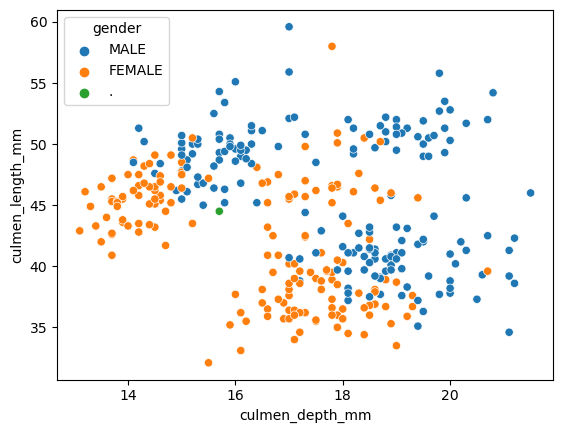

In [56]:
# please use seaborn to scatter plot X
import seaborn as sns

sns.scatterplot(x = 'culmen_depth_mm', y = 'culmen_length_mm',data = data, hue = 'gender')



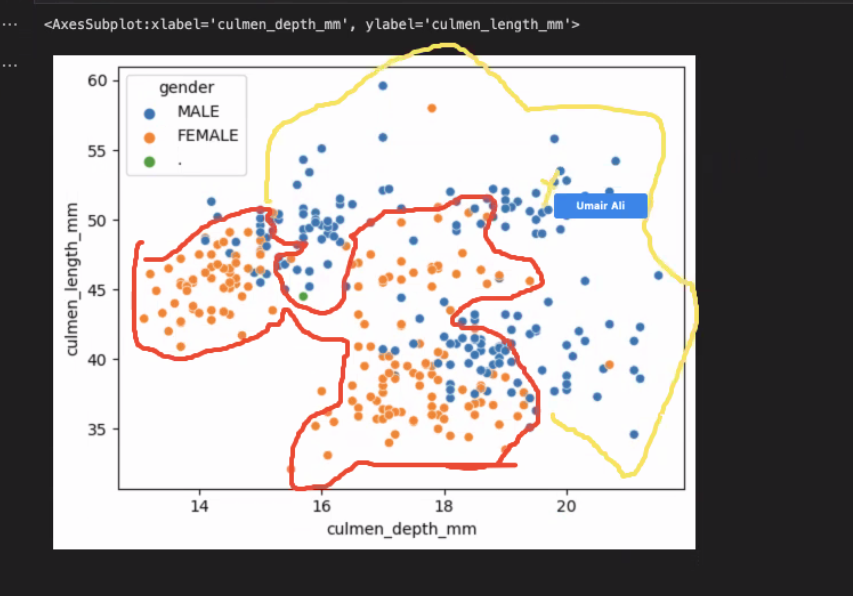

In [57]:
centroids = data.groupby('gender')['culmen_depth_mm','culmen_length_mm'].mean()

centroids


/var/folders/l_/j699flmx6dbc1vlb90jx_hyw0000gn/T/ipykernel_49029/3181817900.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  centroids = data.groupby('gender')['culmen_depth_mm','culmen_length_mm'].mean()


,culmen_depth_mm,culmen_length_mm
gender,,
.,15.700000,44.500000
FEMALE,16.425455,42.096970
MALE,17.904734,45.831953


In [58]:
import matplotlib.pyplot as plt

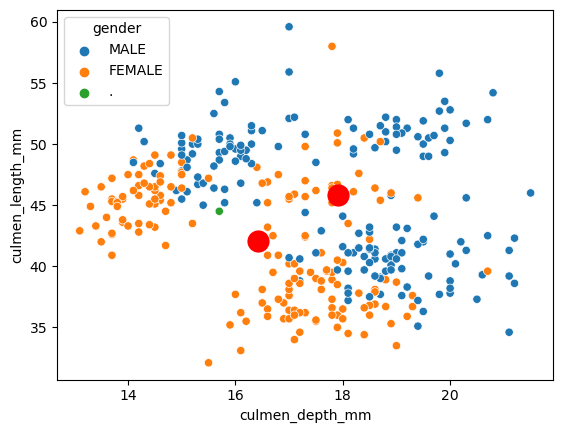

In [59]:

sns.scatterplot(x = 'culmen_depth_mm', y = 'culmen_length_mm',data = data, hue = 'gender')
plt.scatter(centroids.iloc[1:,0],centroids.iloc[1:,1],linewidths=10,c='red')


/Users/angelasthingy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


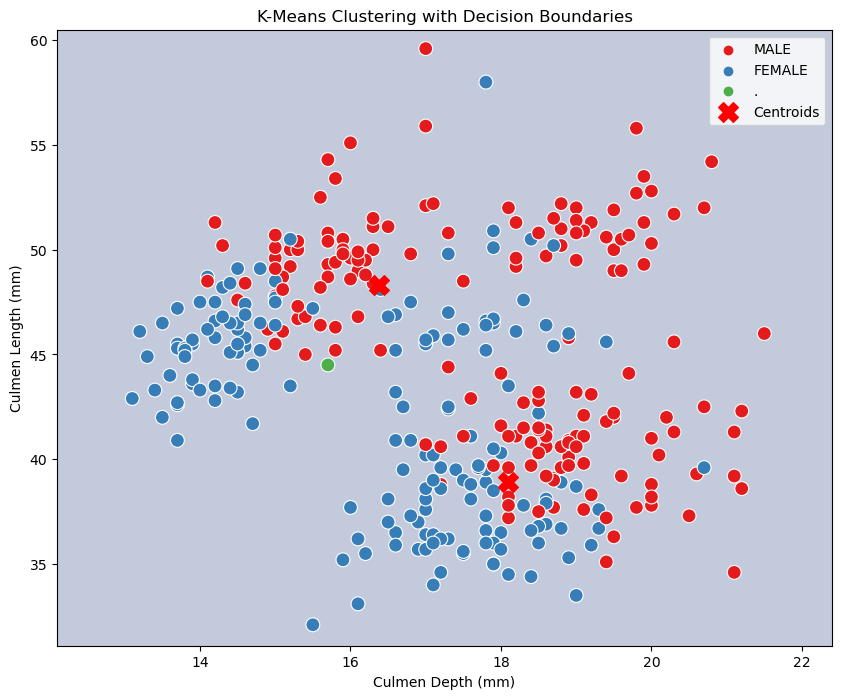

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Sample DataFrame


df = data.copy()

# Number of clusters
n_clusters = 2

# Fit K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(df[['culmen_length_mm', 'culmen_depth_mm']])
centroids = kmeans.cluster_centers_

# Create a mesh grid for plotting decision boundaries
x_min, x_max = df['culmen_depth_mm'].min() - 1, df['culmen_depth_mm'].max() + 1
y_min, y_max = df['culmen_length_mm'].min() - 1, df['culmen_length_mm'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict cluster labels for the grid points
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot the data points and centroids
sns.scatterplot(x='culmen_depth_mm', y='culmen_length_mm', data=df, hue='gender', palette='Set1', s=100)
plt.scatter(centroids[:, 1], centroids[:, 0], s=200, c='red', marker='X', label='Centroids')

plt.title('K-Means Clustering with Decision Boundaries')
plt.xlabel('Culmen Depth (mm)')
plt.ylabel('Culmen Length (mm)')
plt.legend()
plt.show()
